Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 728s 930ms/step - accuracy: 0.2217 - loss: 2.1572 - val_accuracy: 0.4689 - val_loss: 1.5980
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 738s 924ms/step - accuracy: 0.4358 - loss: 1.6238 - val_accuracy: 0.5063 - val_loss: 1.4530
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 740s 922ms/step - accuracy: 0.4777 - loss: 1.4972 - val_accuracy: 0.5251 - val_loss: 1.3888
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 694s 887ms/step - accuracy: 0.5049 - loss: 1.4290 - val_accuracy: 0.5363 - val_loss: 1.3432
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 694s 887ms/step - accuracy: 0.5224 - loss: 1.3774 - val_accuracy: 0.5446 - val_loss: 1.3115
313/313 ━━━━━━━━━━━━━━━━━━━━ 120s 383ms/step


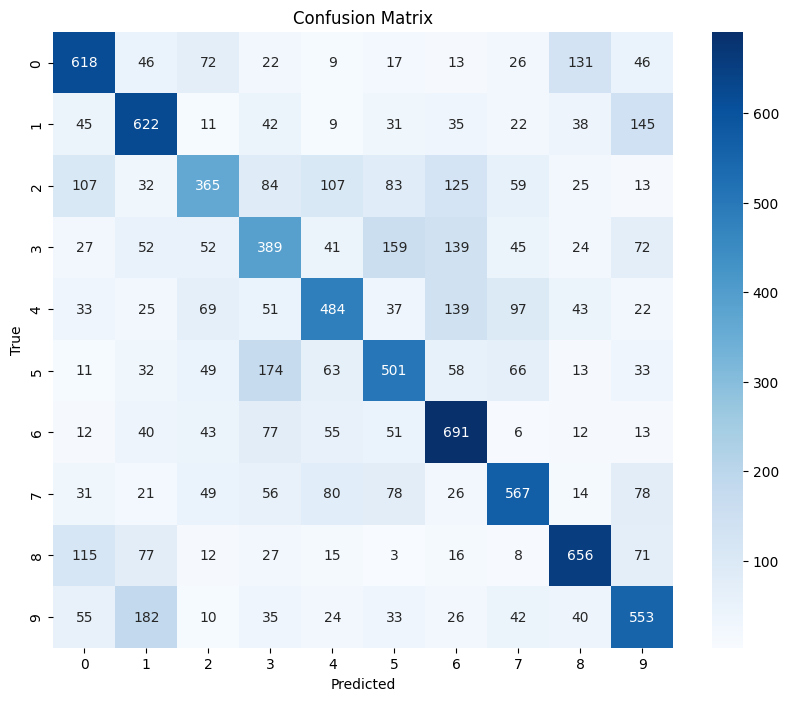

              precision    recall  f1-score   support

           0       0.59      0.62      0.60      1000
           1       0.55      0.62      0.58      1000
           2       0.50      0.36      0.42      1000
           3       0.41      0.39      0.40      1000
           4       0.55      0.48      0.51      1000
           5       0.50      0.50      0.50      1000
           6       0.54      0.69      0.61      1000
           7       0.60      0.57      0.59      1000
           8       0.66      0.66      0.66      1000
           9       0.53      0.55      0.54      1000

    accuracy                           0.54     10000
   macro avg       0.54      0.54      0.54     10000
weighted avg       0.54      0.54      0.54     10000



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0


y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
base_model.trainable = False


x = Flatten()(base_model.output)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
out = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=out)


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_true, y_pred_classes))
